In [1]:
import pandas as pd
import random
import re
import numpy as np
import operator
import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pickle
from collections import Counter, defaultdict

In [2]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
data = pd.read_csv('processed_data.csv')

In [4]:
flairs = np.unique(data.flair)

In [5]:
flairs

array(['Announcement', 'AskIndia', 'Bangladesh (Grand Son )',
       'Business/Finance', 'CAA-NRC', 'CAA-NRC-NPR', 'Coronavirus',
       'Demonetization', 'Food', 'India (Dad)', 'Non-Political',
       'Official Sadness Thread', 'Old', 'Original Comics',
       'Pakistan (Son)', 'Photography', 'Policy & Economy',
       'Policy/Economy', 'Policy/Economy -2017 Article ', 'Politics',
       'Politics -- Source in comments', 'Politics [Megathread]',
       'Scheduled', 'Science/Technology', 'Sports',
       'The whole family 👪 will play quarter - finals ', 'Totally real',
       'Unverified', 'Zoke Tyme', '[R]eddiquette'], dtype=object)

In [6]:
data.head()

,flair,title,score,id,url,comms_num,body,author,comments,timestamp,feature_combine
0,CAA-NRC,bjp digging grave caa nrc npr,753,eqbcz2,https://i.redd.it/48nytcnskgb41.jpg,102.0,NaN,GPA9304,nope know cant good governance divide people e...,2020-01-18 17:13:51,bjp digging grave caa nrc npr nope know cant g...
1,CAA-NRC,spotted anti caa nrc rally dunkin donuts berli...,735,eqhfw3,https://i.redd.it/uzdly44tyjb41.jpg,68.0,NaN,Slimshady9829,genuine question matter people protest foreign...,2020-01-19 04:37:40,spotted anti caa nrc rally dunkin donuts berli...
2,CAA-NRC,cousin strongly supports caa nrc unable explai...,7,fceyh5,https://www.reddit.com/r/india/comments/fceyh5...,12.0,cousin india strongly supports caanrc trying u...,ultimatereal,know might downvoted saying worth arguing spoi...,2020-03-03 06:22:10,cousin strongly supports caa nrc unable explai...
3,CAA-NRC,15 lakh 150 000 people protest peacefully #caa...,647,eei8rn,https://twitter.com/the_bongrel/status/1209028...,24.0,NaN,in3po,seriously think bjp might pulled goal muslims ...,2019-12-23 22:39:17,15 lakh 150 000 people protest peacefully #caa...
4,CAA-NRC,people eliminated caa nrc process wont get cit...,181,eivymz,https://www.reddit.com/r/india/comments/eivymz...,19.0,common misconception seeing making rounds get ...,entirepolscience,best explanation caanrc seen https wwwyoutubec...,2020-01-02 22:37:22,people eliminated caa nrc process wont get cit...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 11 columns):
flair              4463 non-null object
title              4458 non-null object
score              4460 non-null object
id                 4460 non-null object
url                4459 non-null object
comms_num          4459 non-null float64
body               2516 non-null object
author             4458 non-null object
comments           4064 non-null object
timestamp          4458 non-null object
feature_combine    4459 non-null object
dtypes: float64(1), object(10)
memory usage: 383.6+ KB


In [8]:
data.flair.value_counts()

Politics                                          249
Coronavirus                                       248
Old                                               247
Announcement                                      246
CAA-NRC                                           244
Food                                              244
AskIndia                                          238
Scheduled                                         234
Business/Finance                                  233
Sports                                            232
Demonetization                                    225
Photography                                       222
Science/Technology                                221
Policy/Economy                                    220
Policy & Economy                                  220
Non-Political                                     217
Totally real                                      202
Unverified                                        126
CAA-NRC-NPR                 

In [9]:
data['feature_combine'].isna().any()

True

In [10]:
data['feature_combine'].isna().sum()

4

In [11]:
data_new = data[data['feature_combine'].notna()]

In [12]:
data_new['feature_combine'].isna().any()

False

In [13]:
data_new

,flair,title,score,id,url,comms_num,body,author,comments,timestamp,feature_combine
0,CAA-NRC,bjp digging grave caa nrc npr,753,eqbcz2,https://i.redd.it/48nytcnskgb41.jpg,102.0,NaN,GPA9304,nope know cant good governance divide people e...,2020-01-18 17:13:51,bjp digging grave caa nrc npr nope know cant g...
1,CAA-NRC,spotted anti caa nrc rally dunkin donuts berli...,735,eqhfw3,https://i.redd.it/uzdly44tyjb41.jpg,68.0,NaN,Slimshady9829,genuine question matter people protest foreign...,2020-01-19 04:37:40,spotted anti caa nrc rally dunkin donuts berli...
2,CAA-NRC,cousin strongly supports caa nrc unable explai...,7,fceyh5,https://www.reddit.com/r/india/comments/fceyh5...,12.0,cousin india strongly supports caanrc trying u...,ultimatereal,know might downvoted saying worth arguing spoi...,2020-03-03 06:22:10,cousin strongly supports caa nrc unable explai...
3,CAA-NRC,15 lakh 150 000 people protest peacefully #caa...,647,eei8rn,https://twitter.com/the_bongrel/status/1209028...,24.0,NaN,in3po,seriously think bjp might pulled goal muslims ...,2019-12-23 22:39:17,15 lakh 150 000 people protest peacefully #caa...
4,CAA-NRC,people eliminated caa nrc process wont get cit...,181,eivymz,https://www.reddit.com/r/india/comments/eivymz...,19.0,common misconception seeing making rounds get ...,entirepolscience,best explanation caanrc seen https wwwyoutubec...,2020-01-02 22:37:22,people eliminated caa nrc process wont get cit...
5,CAA-NRC,modi government deport canadian commenting ind...,270,egdjdt,https://twitter.com/bainjal/status/12105597319...,19.0,NaN,in3po,leave alone please indian past life forgets ca...,2019-12-28 06:24:13,modi government deport canadian commenting ind...
6,CAA-NRC,trump discuss caa nrc issues modi india visit ...,68,f7ma50,https://timesofindia.indiatimes.com/india/trum...,20.0,NaN,dlisfyn,kya discuss karega yeh full form mean politics...,2020-02-22 16:11:22,trump discuss caa nrc issues modi india visit ...
7,CAA-NRC,seattle city council passes resolution caa nrc,15,eylxlp,https://www.thehindu.com/news/international/se...,7.0,NaN,NyetNeinNo,moment minor city government distant country i...,2020-02-04 20:07:10,seattle city council passes resolution caa nrc...
8,CAA-NRC,young indians save country bravo girl #caa_nrc...,166,edssgq,https://twitter.com/INCTharoorian/status/12084...,13.0,NaN,fuckyallmat,power also raised valid questions regarding fl...,2019-12-22 07:11:03,young indians save country bravo girl #caa_nrc...
9,CAA-NRC,police barbaric lathicharge jamia students pea...,337,f1rveh,https://twitter.com/nsui/status/12268199137313...,7.0,NaN,in3po,saying lathicharge happened jamia lathis weren...,2020-02-11 04:59:24,police barbaric lathicharge jamia students pea...


In [14]:
#Using flairs from left posts

In [15]:
np.unique(data_new['flair'])

array(['Announcement', 'AskIndia', 'Business/Finance', 'CAA-NRC',
       'CAA-NRC-NPR', 'Coronavirus', 'Demonetization', 'Food',
       'Non-Political', 'Official Sadness Thread', 'Old',
       'Original Comics', 'Photography', 'Policy & Economy',
       'Policy/Economy', 'Policy/Economy -2017 Article ', 'Politics',
       'Politics -- Source in comments', 'Politics [Megathread]',
       'Scheduled', 'Science/Technology', 'Sports', 'Totally real',
       'Unverified', 'Zoke Tyme', '[R]eddiquette'], dtype=object)

In [16]:
data_new['flair'].value_counts()

Politics                          249
Coronavirus                       248
Old                               247
Announcement                      246
Food                              244
CAA-NRC                           244
AskIndia                          238
Scheduled                         234
Business/Finance                  233
Sports                            232
Demonetization                    225
Photography                       222
Science/Technology                221
Policy/Economy                    220
Policy & Economy                  220
Non-Political                     217
Totally real                      202
Unverified                        126
CAA-NRC-NPR                       111
Politics -- Source in comments    106
Policy/Economy -2017 Article      101
Original Comics                    26
Zoke Tyme                          23
[R]eddiquette                      18
Politics [Megathread]               5
Official Sadness Thread             1
Name: flair,

In [17]:
#removing flairs with less than 50 posts
to_remove = {'Original Comics', 'Zoke Tyme', '[R]eddiquette', 'Politics [Megathread]', 'Official Sadness Thread'}
flairs = list(set(flairs) - to_remove)

In [18]:
len(flairs)

25

In [19]:
for ele in to_remove:
    data_new = data_new[data.flair != ele]

/home/dexter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [20]:
n_posts_remove = 0
for ele in to_remove:
    n_posts_remove+=data['flair'].value_counts()[ele]

In [21]:
data_new['flair'].value_counts()

Politics                          249
Coronavirus                       248
Old                               247
Announcement                      246
Food                              244
CAA-NRC                           244
AskIndia                          238
Scheduled                         234
Business/Finance                  233
Sports                            232
Demonetization                    225
Photography                       222
Science/Technology                221
Policy/Economy                    220
Policy & Economy                  220
Non-Political                     217
Totally real                      202
Unverified                        126
CAA-NRC-NPR                       111
Politics -- Source in comments    106
Policy/Economy -2017 Article      101
Name: flair, dtype: int64

In [22]:
data_new.groupby('flair').count()['title'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8, title='Number of posts in each flair', xTitle='Flairs')

In [23]:
#Observation: Number of samples of Policy/Economy and Politics is almost 
# half of the number of samples of Politics class

#Conclusion: Use weighted classifier

In [23]:
# Since the dataframe mainly contains text data, 
# checking correlation and presence of outliers does not help

In [24]:
##Checking top words used in content of posts for each flair class

In [25]:
ana = defaultdict()
excep = 0
for i in range(len(data_new)):
    #ana[data['flair'][i]].value
    try:
        fl = data_new['flair'][i]
        #print(fl)
        if fl in ana:
            s = ana[fl]
            #print(ana['CAA-NRC'])
            s1 = s + ' ' + data_new['feature_combine'][i]
            ana[fl] = s1
        else:
            ana[fl] = data_new['feature_combine'][i]
    except KeyError:
        #print('Key Error at ',i)
        excep+=1
        continue

In [26]:
excep

76

In [27]:
print('Expected excep = ', n_posts_remove)

Expected excep =  73


In [28]:
with open('ana','wb') as inf:
    pickle.dump(ana, inf)

In [29]:
flairs = np.unique(data_new.flair)

In [36]:
data_new.to_csv("data/cleaned_data.csv", index=None)

/home/dexter/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



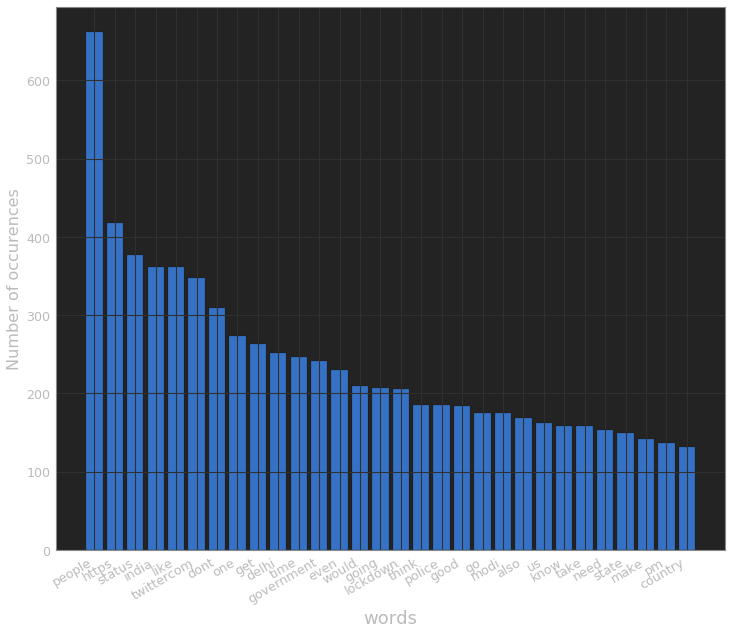

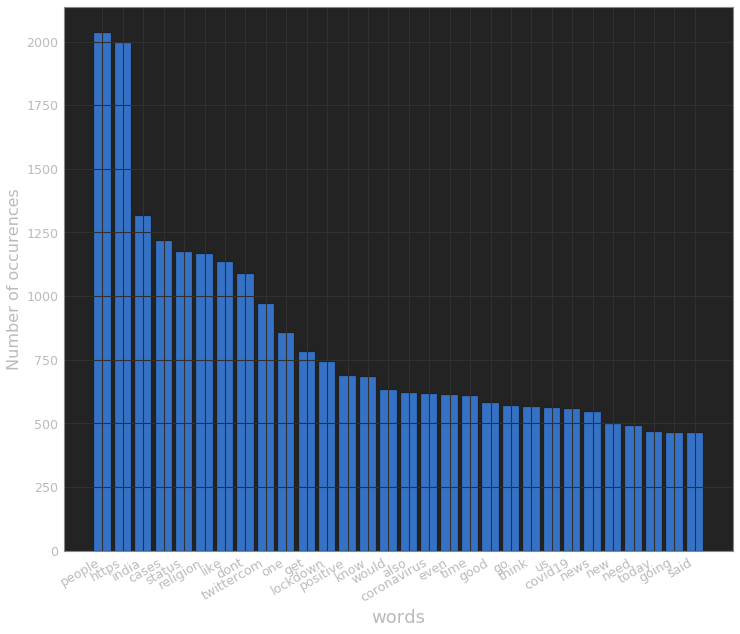

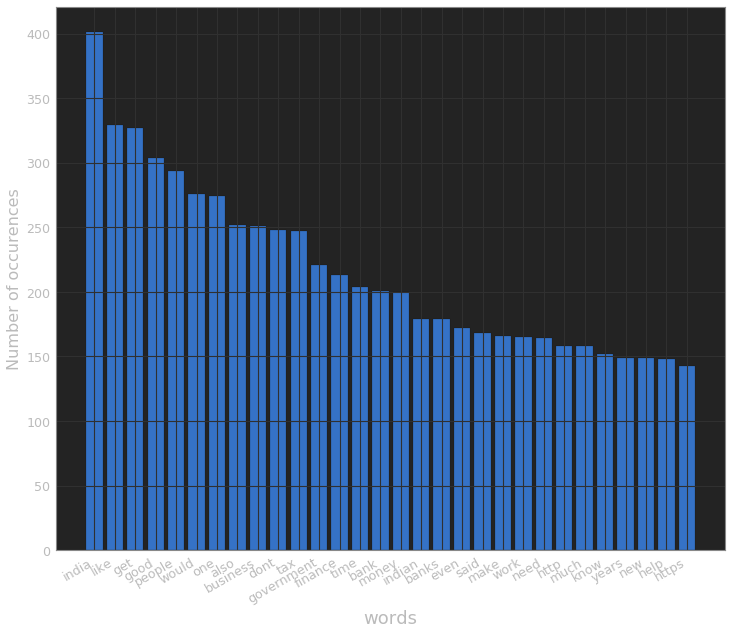

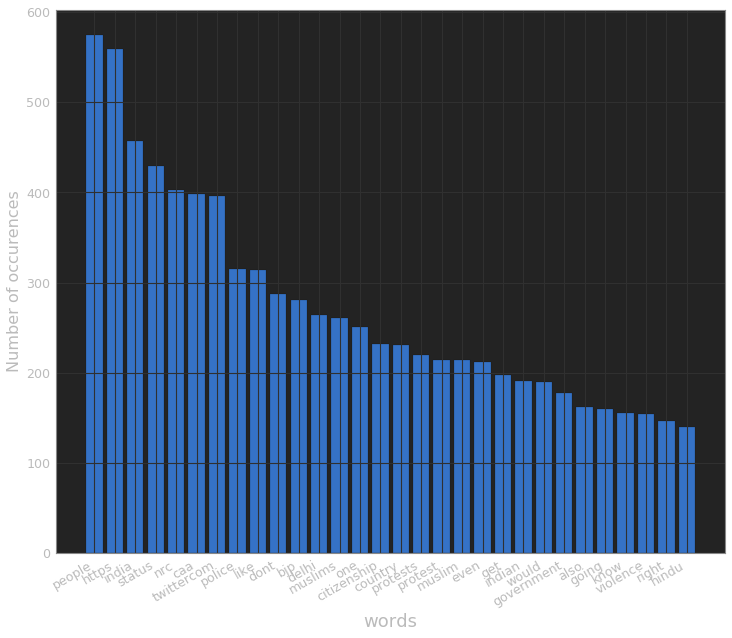

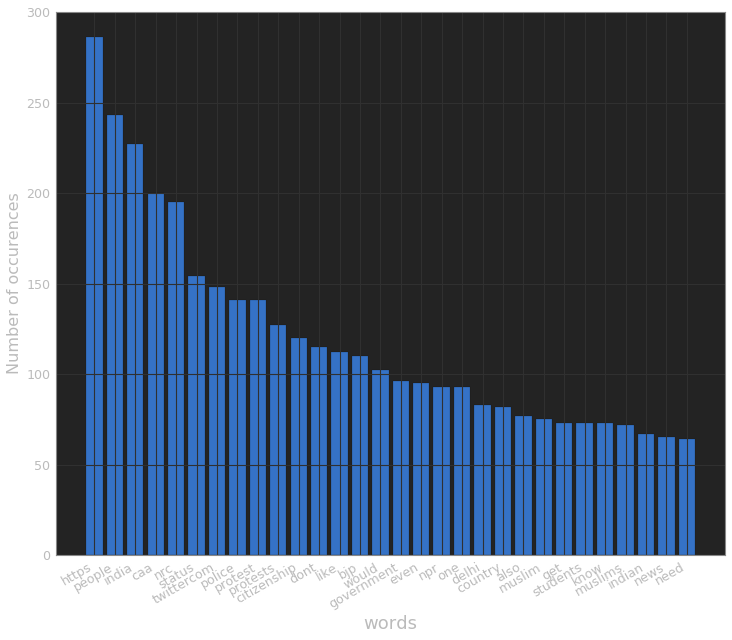

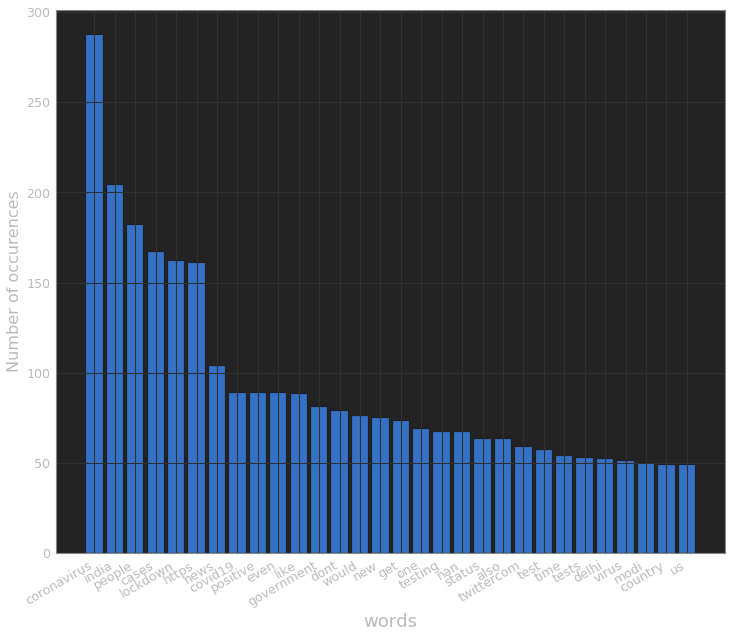

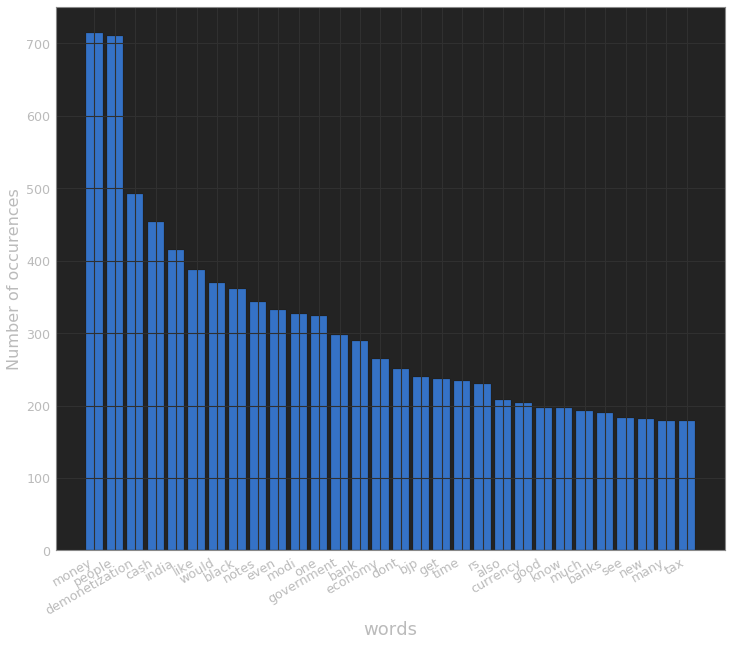

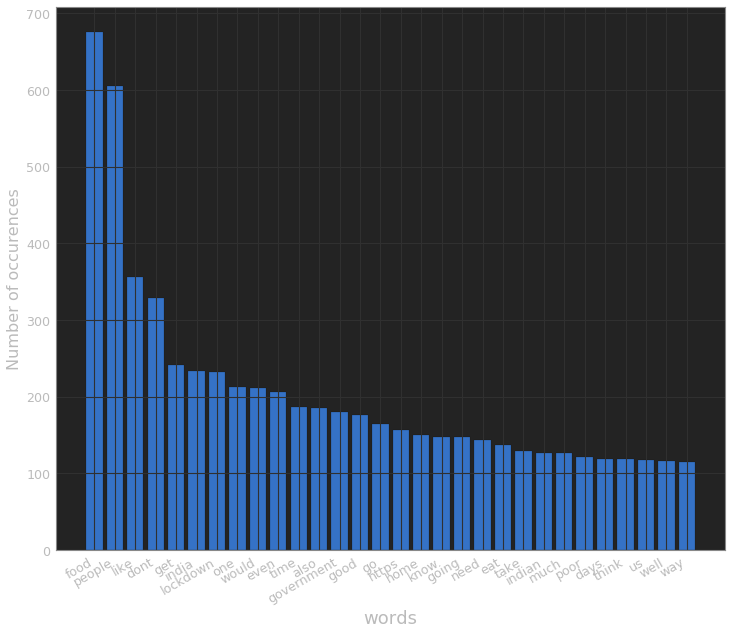

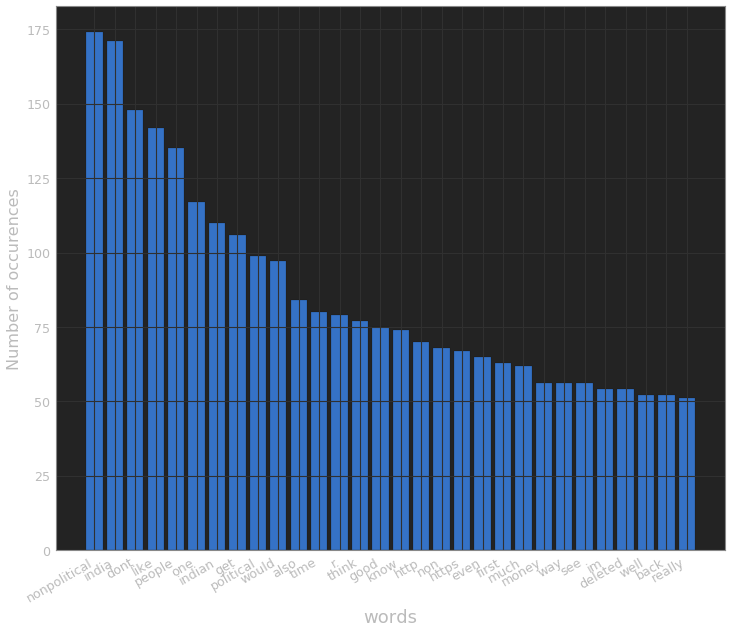

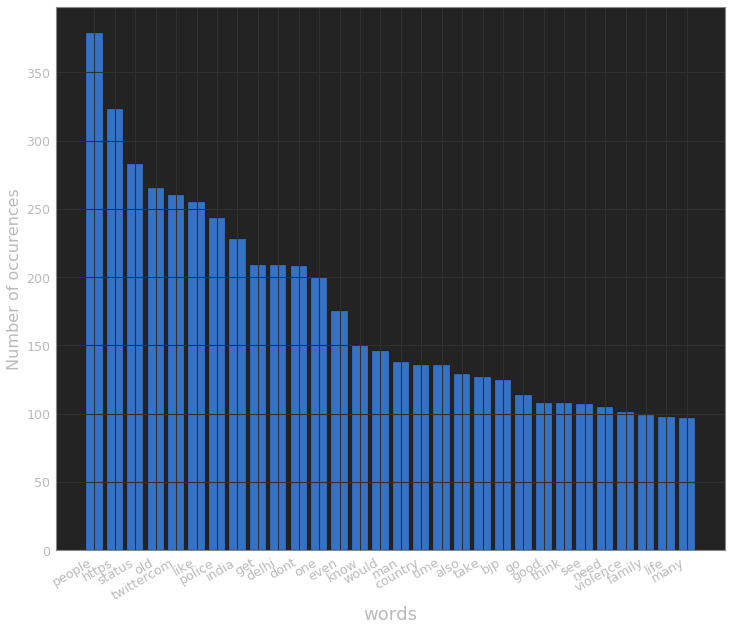

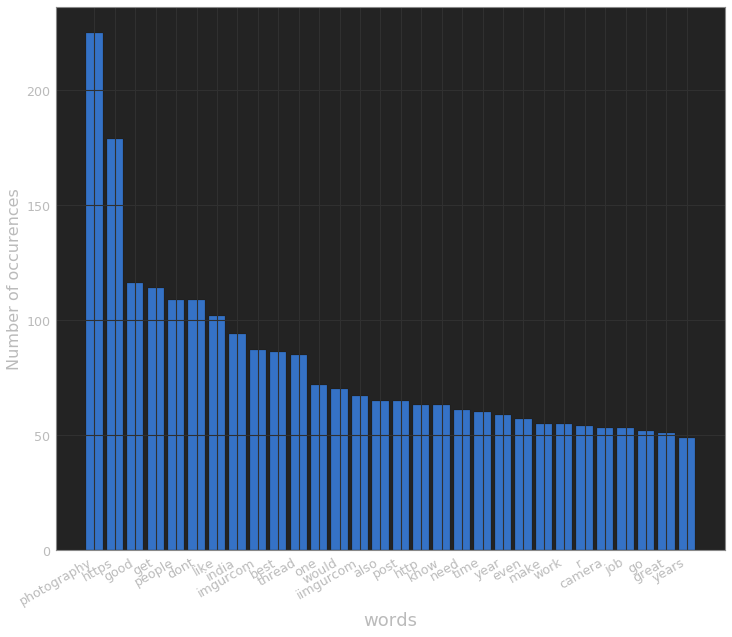

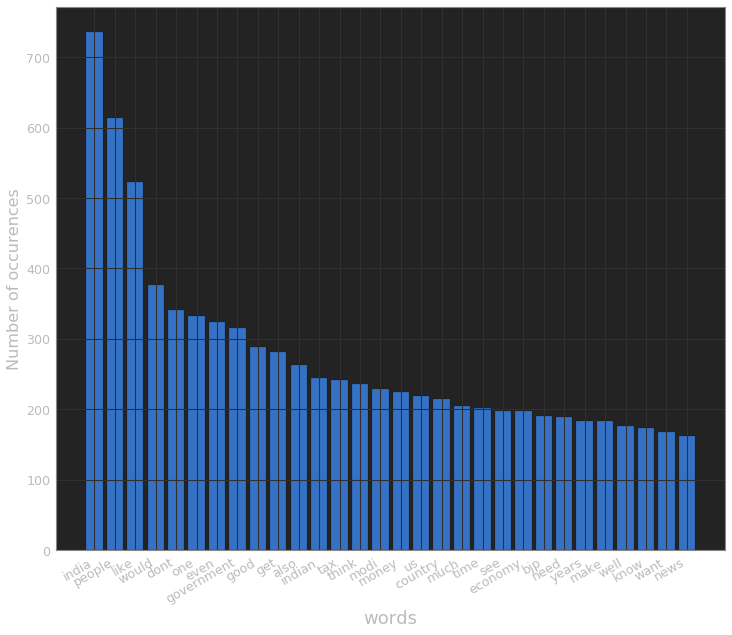

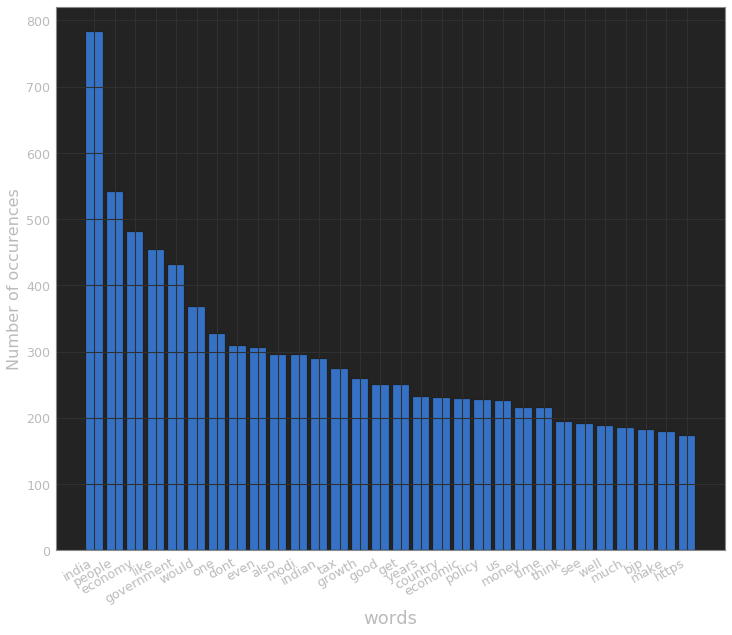

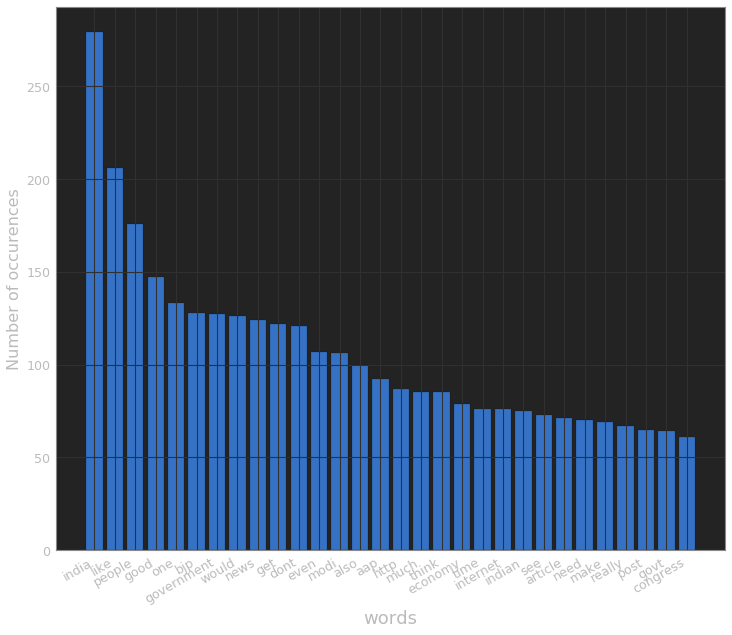

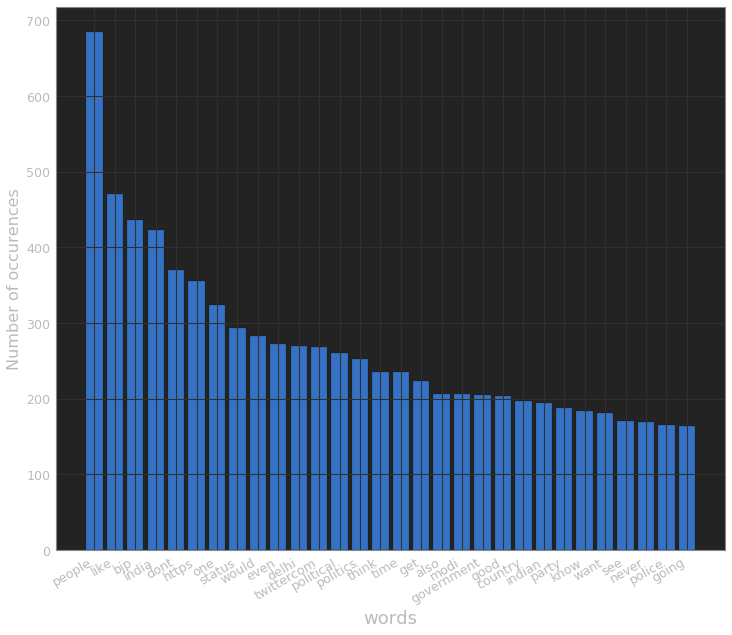

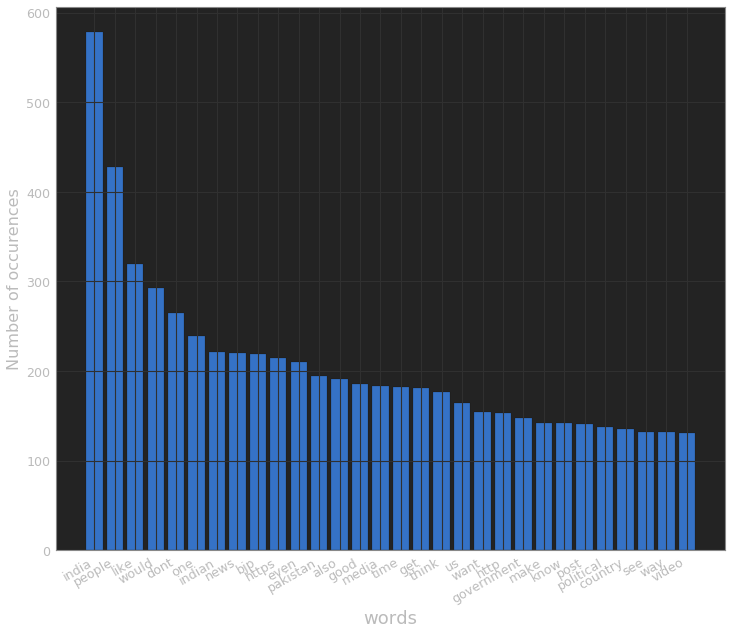

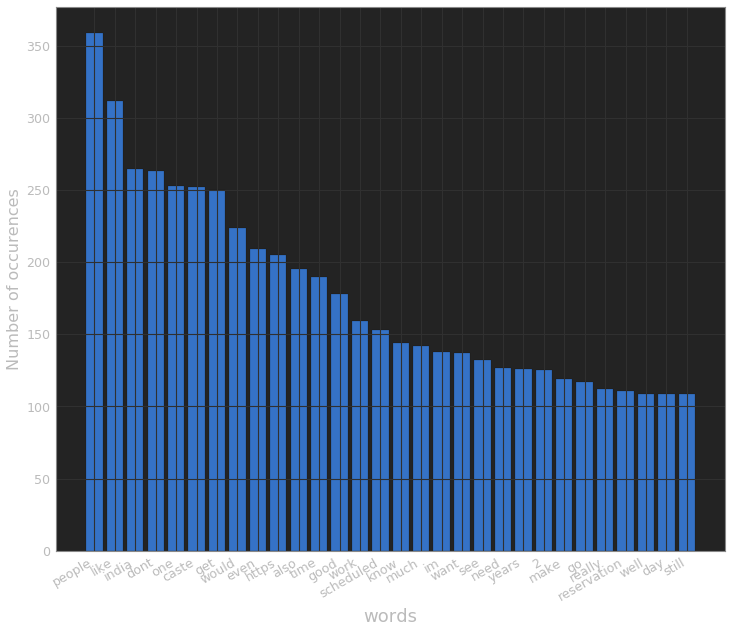

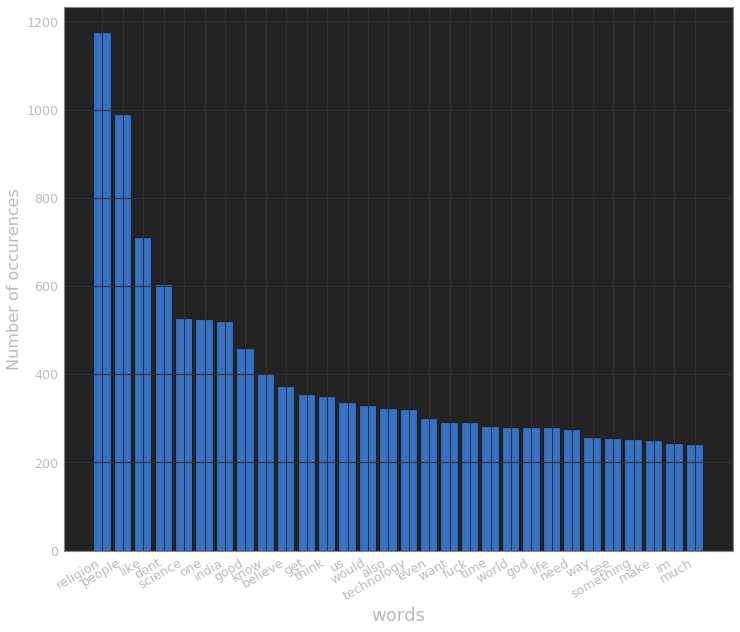

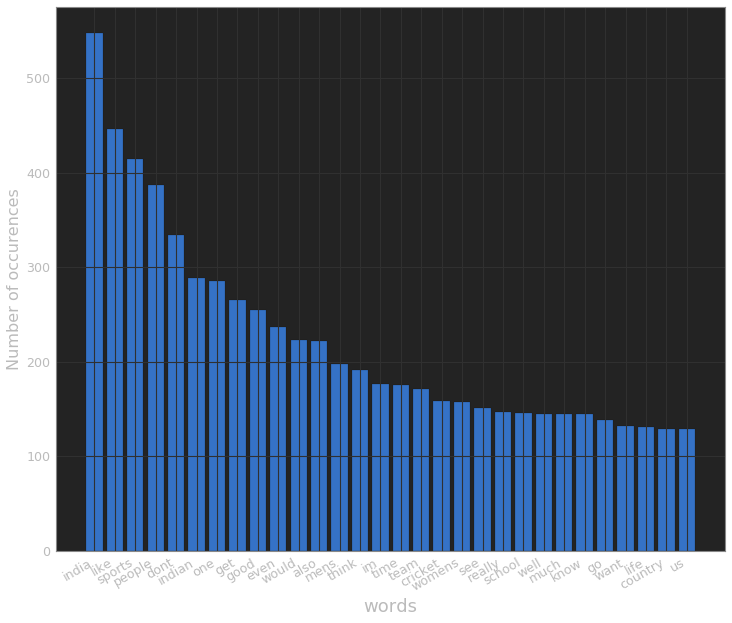

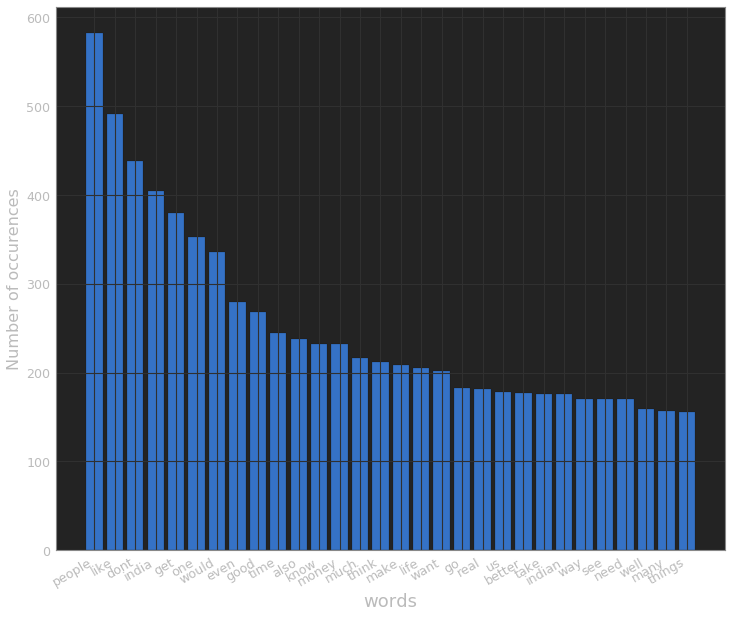

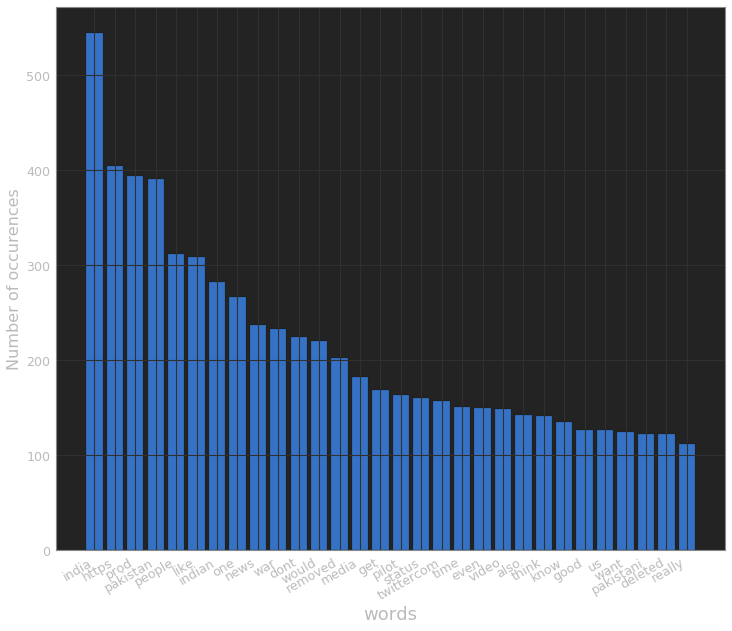

In [30]:
for i in flairs:
    plt.figure(figsize = [12,10])
    ax = plt.axes()
    #print(flairs)
    freqs = Counter(ana[i].split())
    f =sorted(freqs.items(), key = operator.itemgetter(1) ,reverse = True)
    ax.bar(dict(f[:30]).keys(), dict(f[:30]).values(), edgecolor='black')
    plt.xlabel('words', fontsize=18)
    plt.ylabel('Number of occurences', fontsize=16)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [31]:
##CHECKING NUMBER OF COMMENTS FOR EACH FLAIR

In [32]:
comms_num_freq = defaultdict()
excep = 0
for i in range(len(data_new)):
    #ana[data['flair'][i]].value
    try:
        fl = data_new['flair'][i]
        #print(fl)
        if fl in comms_num_freq:
            s = comms_num_freq[fl]
            #print(ana['CAA-NRC'])
            s1 = s + data_new['comms_num'][i]
            comms_num_freq[fl] = s1
        else:
            comms_num_freq[fl] = data_new['comms_num'][i]
    except KeyError:
        #print('Key Error at ',i)
        excep+=1
        continue

In [33]:
excep

76

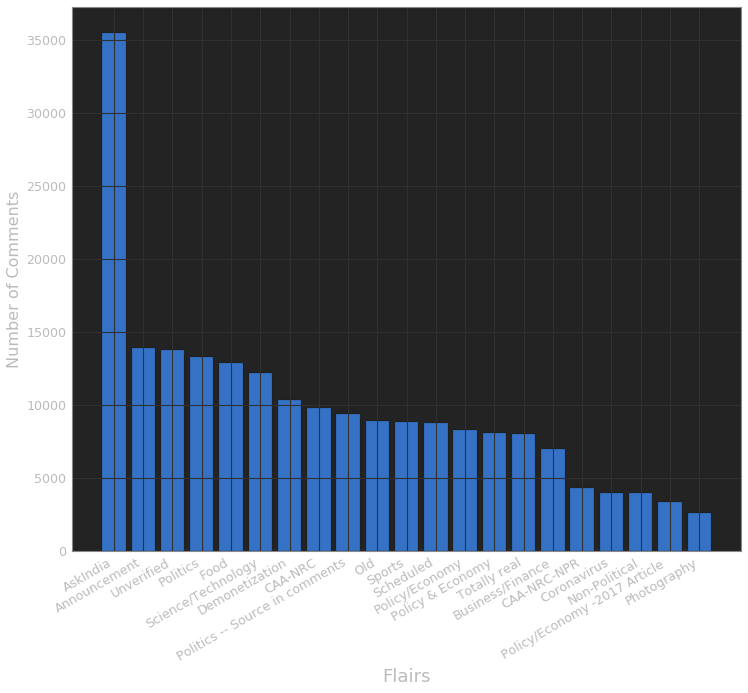

In [34]:
plt.figure(figsize = [12,10])
#print(flairs)
ax = plt.axes()
freqs = comms_num_freq
f =sorted(freqs.items(), key = operator.itemgetter(1) ,reverse = True)
ax.bar(dict(f[:30]).keys(), dict(f[:30]).values(), edgecolor='black')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.xlabel('Flairs', fontsize=18)
plt.ylabel('Number of Comments', fontsize=16)
plt.show()

In [35]:
##Checking common authors of posts for each flair
##Initial intuition was to detect author distribution across different flairs, but most posts are by unique authors and 
## there are not many intances of multiple posts by a single author. 
# So, instead of number of posts and flair of the posts by all authors, I checked the unique authors in each flair. 

In [36]:
authors = defaultdict()
excep = 0
for i in range(len(data_new)):
    try:
        fl = data_new['flair'][i]
        if fl in ana:
            s = ana[fl]
            #print(ana['CAA-NRC'])
            s1 = s + ' ' + data_new['feature_combine'][i]
            authors[fl] = s1
        else:
            authors[fl] = data_new['feature_combine'][i]
    except KeyError:
        #print('Key Error at ',i)
        excep+=1
        continue

In [37]:
data_new.groupby('flair').count()['author'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=1, title='Number of Authors in each flair', xTitle='Flairs')

In [38]:
data_new.groupby('flair').count()

,title,score,id,url,comms_num,body,author,comments,timestamp,feature_combine
flair,,,,,,,,,,
Announcement,245,246,246,246,246,85,246,226,246,246
AskIndia,238,238,238,238,238,230,238,228,238,238
Business/Finance,233,233,233,233,233,188,233,226,233,233
CAA-NRC,244,244,244,244,244,74,244,210,244,244
CAA-NRC-NPR,111,111,111,111,111,42,111,95,111,111
Coronavirus,248,248,248,248,248,34,248,181,248,248
Demonetization,225,225,225,225,225,114,225,222,225,225
Food,243,244,244,244,244,80,244,224,244,244
Non-Political,217,217,217,217,217,109,217,194,217,217


In [39]:
##Observation: all attributes have some null values except feature_combine

In [40]:
##Timestamp of posts

In [41]:
df = data_new
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df['day'] = df.index.date
counts = df.groupby(['day', 'flair']).agg(len)
#counts = pd.DataFrame(counts, columns=['count'])

In [42]:
counts

,,title,score,id,url,comms_num,body,author,comments,feature_combine
day,flair,,,,,,,,,
2009-09-25,Photography,1,1,1,1,1.0,1,1,1,1
2009-10-16,Photography,1,1,1,1,1.0,1,1,1,1
2010-01-03,Photography,1,1,1,1,1.0,1,1,1,1
2010-05-03,Photography,1,1,1,1,1.0,1,1,1,1
2010-11-25,Photography,1,1,1,1,1.0,1,1,1,1
2011-01-25,Totally real,1,1,1,1,1.0,1,1,1,1
2011-02-07,Photography,1,1,1,1,1.0,1,1,1,1
2011-05-20,Non-Political,1,1,1,1,1.0,1,1,1,1
2011-05-24,Business/Finance,1,1,1,1,1.0,1,1,1,1


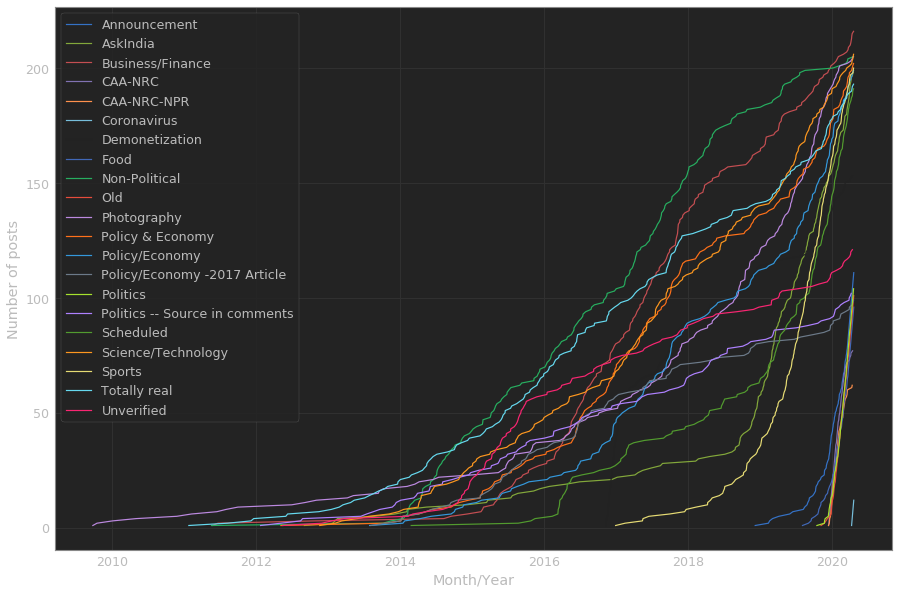

In [46]:
times = []
plt.figure(figsize=[15,10])
for f in flairs:
    l = defaultdict.fromkeys(['count', 'timestamp'])
    l['count'] = []
    c = 0
    l['timestamp'] = []
    #print(f)
    for i in range(len(counts)):
        j = counts.index[i]
        if j[1]==f:
            c+=1
            l['count'].append(c)
            l['timestamp'].append(j[0])
    plt.plot(l['timestamp'], l['count'], label = f)
plt.xlabel("Month/Year")
plt.ylabel("Number of posts")
plt.legend()
plt.show()

In [44]:
##Similar trends in many flairs. Using timestamp as a feature may not be very helpful